# Dataset
The following categorical variables have been encoded into numberic ordinal scale:

- Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


In [30]:
#Read CSV
df = pd.read_csv('hr_attrition_data.csv')
# Add colums with categorical variables for visualization
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Education_label'] = df['Education'].map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction_label'] = df['EnvironmentSatisfaction'].map({ 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement_label'] = df['JobInvolvement'].map({1 : 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction_label'] = df['JobSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating_label'] = df['PerformanceRating'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['RelationshipSatisfaction_label'] = df['RelationshipSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance_label'] = df['WorkLifeBalance'].map({1:'Bad',2:'Good', 3: 'Better', 4: 'Best'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             1470 non-null   int64 
 1   Attrition                       1470 non-null   object
 2   BusinessTravel                  1470 non-null   object
 3   DailyRate                       1470 non-null   int64 
 4   Department                      1470 non-null   object
 5   DistanceFromHome                1470 non-null   int64 
 6   Education                       1470 non-null   int64 
 7   EducationField                  1470 non-null   object
 8   EmployeeCount                   1470 non-null   int64 
 9   EmployeeNumber                  1470 non-null   int64 
 10  EnvironmentSatisfaction         1470 non-null   int64 
 11  Gender                          1470 non-null   object
 12  HourlyRate                      1470 non-null   

In [31]:
#Show first 5 data entries
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Flag,Education_label,EnvironmentSatisfaction_label,JobInvolvement_label,JobSatisfaction_label,PerformanceRating_label,RelationshipSatisfaction_label,WorkLifeBalance_label
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,5,1,College,Medium,High,Very High,Excellent,Low,Bad
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,7,0,Below College,High,Medium,Medium,Outstanding,Very High,Better
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,1,College,Very High,Medium,High,Excellent,Medium,Better
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,0,Master,Very High,High,High,Excellent,High,Better
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,0,Below College,Low,High,Medium,Excellent,Very High,Better


In [32]:
# Find duplicate rows based EmployeeCount, Over18 and StandardHours
duplicate = df[df.duplicated(['EmployeeCount', 'Over18', 'StandardHours'])]
print("Duplicate Rows based on EmployeeCount, Over18, StandardHours :")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].head(5)
 

Duplicate Rows based on EmployeeCount, Over18, StandardHours :


,EmployeeCount,Over18,StandardHours
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
5,1,Y,80


In [33]:
# Count duplicate rows based EmployeeCount, Over18 and StandardHours
print("Duplicate Rows:")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].shape[0]

Duplicate Rows:


1469

# Preprocessing

In [34]:
# Remove columns with duplicated rows
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [35]:
df.dtypes

Age                                int64
Attrition                         object
BusinessTravel                    object
DailyRate                          int64
Department                        object
DistanceFromHome                   int64
Education                          int64
EducationField                    object
EnvironmentSatisfaction            int64
Gender                            object
HourlyRate                         int64
JobInvolvement                     int64
JobLevel                           int64
JobRole                           object
JobSatisfaction                    int64
MaritalStatus                     object
MonthlyIncome                      int64
MonthlyRate                        int64
NumCompaniesWorked                 int64
OverTime                          object
PercentSalaryHike                  int64
PerformanceRating                  int64
RelationshipSatisfaction           int64
StockOptionLevel                   int64
TotalWorkingYear

# Attration Calculations

## Analyze a single variable

In [36]:
# Keep entries with attration = True
attrition_df = df[df['Attrition_Flag'] == True].copy()

# Calculate the percentage of attrition for each education level
attrition_by_education = attrition_df.groupby('Education_label').size().reset_index(name='AttritionCount')

# Calculate the total number of attritions
total_attrition = attrition_by_education['AttritionCount'].sum()

# Calculate the percentage for each education level
attrition_by_education['AttritionPercentage'] = (attrition_by_education['AttritionCount'] / total_attrition) * 100
attrition_by_education = attrition_by_education.sort_values(ascending=False, by= 'AttritionPercentage')
attrition_by_education


,Education_label,AttritionCount,AttritionPercentage
0,Bachelor,99,41.772152
4,Master,58,24.472574
2,College,44,18.565401
1,Below College,31,13.080169
3,Doctor,5,2.109705


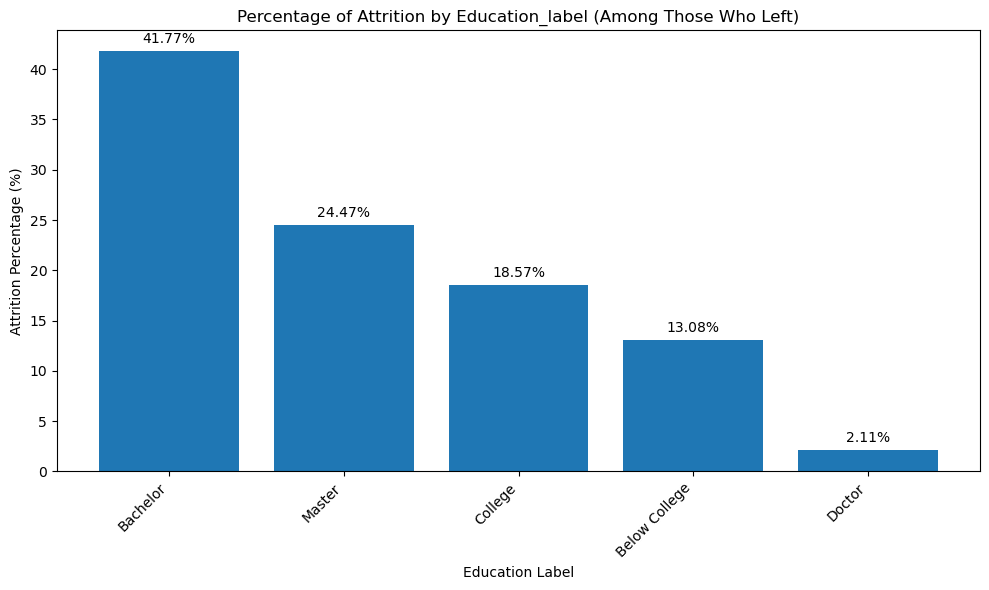

In [40]:
# Create the barplot for attrition_by_education

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(attrition_by_education['Education_label'], attrition_by_education['AttritionPercentage'])
plt.title(f'Percentage of Attrition by {'Education_label'} (Among Those Who Left)')
plt.xlabel('Education_label'.replace('_', ' ').title())
plt.ylabel('Attrition Percentage (%)')

# Add percentage values above the bars
for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze multiple categorical variables by creating functions


--- Analyzing Attrition by: BusinessTravel ---
      BusinessTravel  AttritionCount  AttritionPercentage
2      Travel_Rarely             156            65.822785
1  Travel_Frequently              69            29.113924
0         Non-Travel              12             5.063291


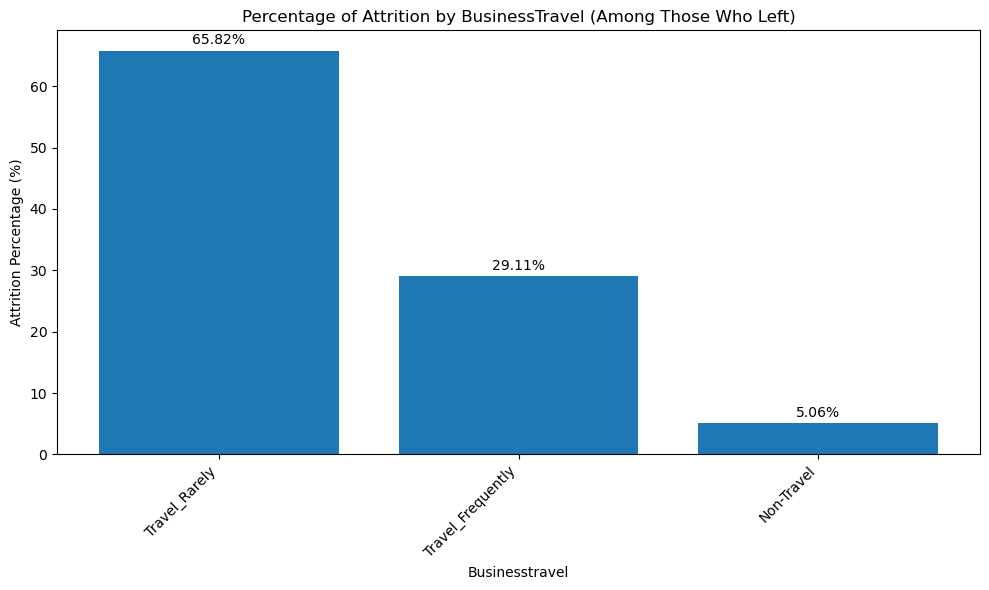


--- Analyzing Attrition by: Department ---
               Department  AttritionCount  AttritionPercentage
1  Research & Development             133            56.118143
2                   Sales              92            38.818565
0         Human Resources              12             5.063291


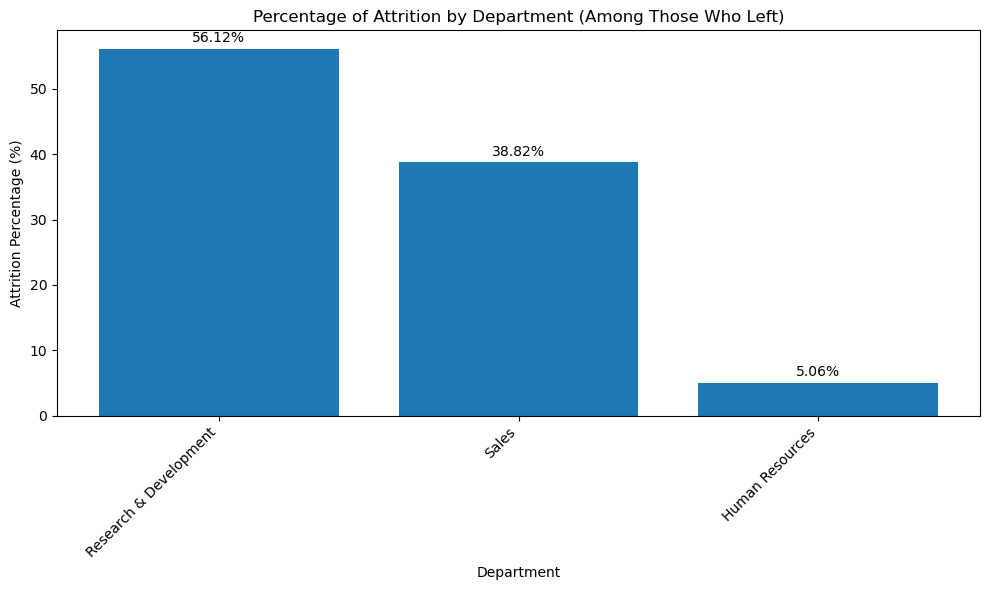


--- Analyzing Attrition by: EducationField ---
     EducationField  AttritionCount  AttritionPercentage
1     Life Sciences              89            37.552743
3           Medical              63            26.582278
2         Marketing              35            14.767932
5  Technical Degree              32            13.502110
4             Other              11             4.641350
0   Human Resources               7             2.953586


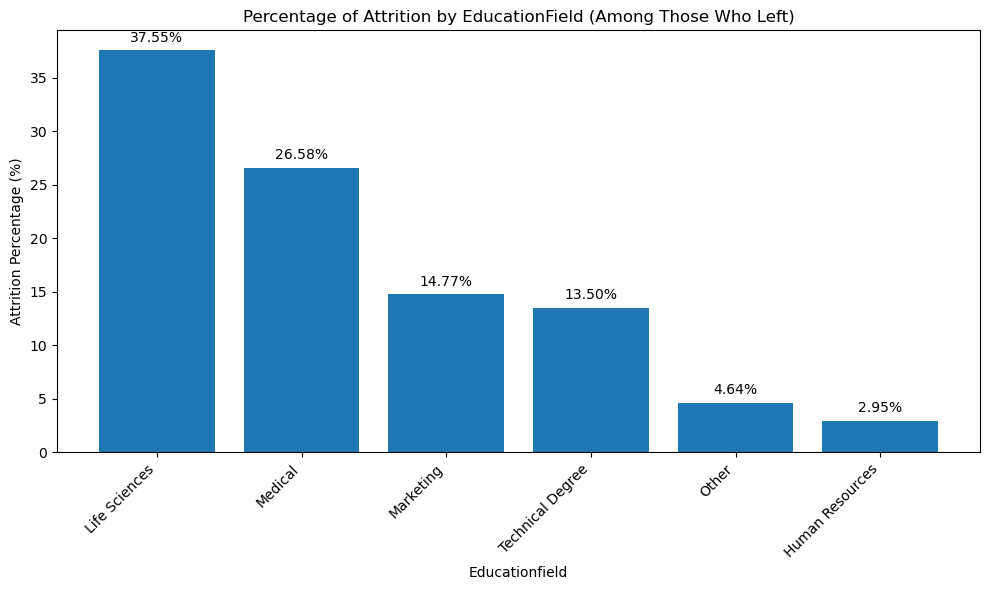


--- Analyzing Attrition by: Gender ---
   Gender  AttritionCount  AttritionPercentage
1    Male             150            63.291139
0  Female              87            36.708861


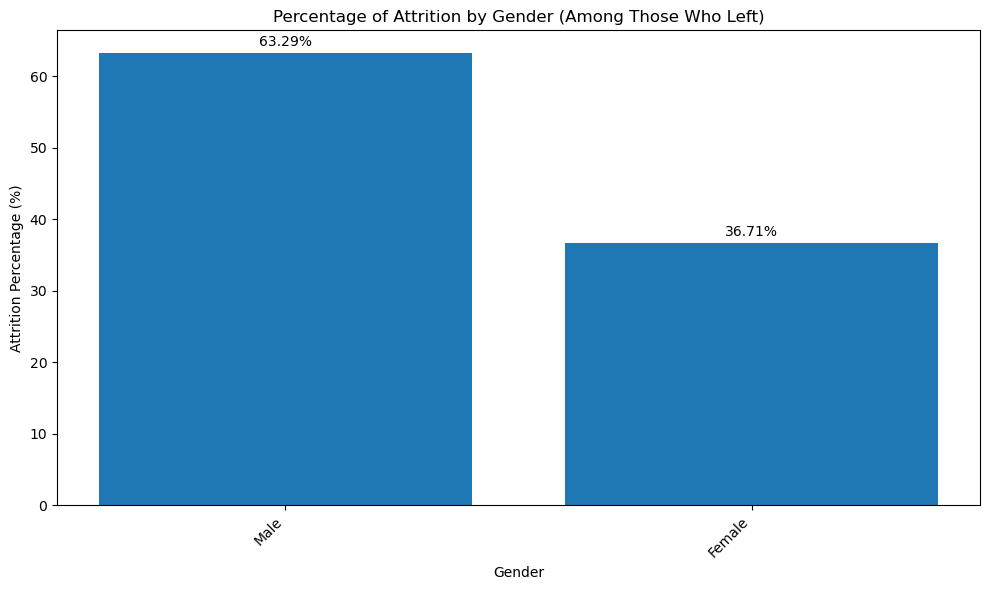


--- Analyzing Attrition by: JobRole ---
                     JobRole  AttritionCount  AttritionPercentage
2      Laboratory Technician              62            26.160338
7            Sales Executive              57            24.050633
6         Research Scientist              47            19.831224
8       Sales Representative              33            13.924051
1            Human Resources              12             5.063291
4     Manufacturing Director              10             4.219409
0  Healthcare Representative               9             3.797468
3                    Manager               5             2.109705
5          Research Director               2             0.843882


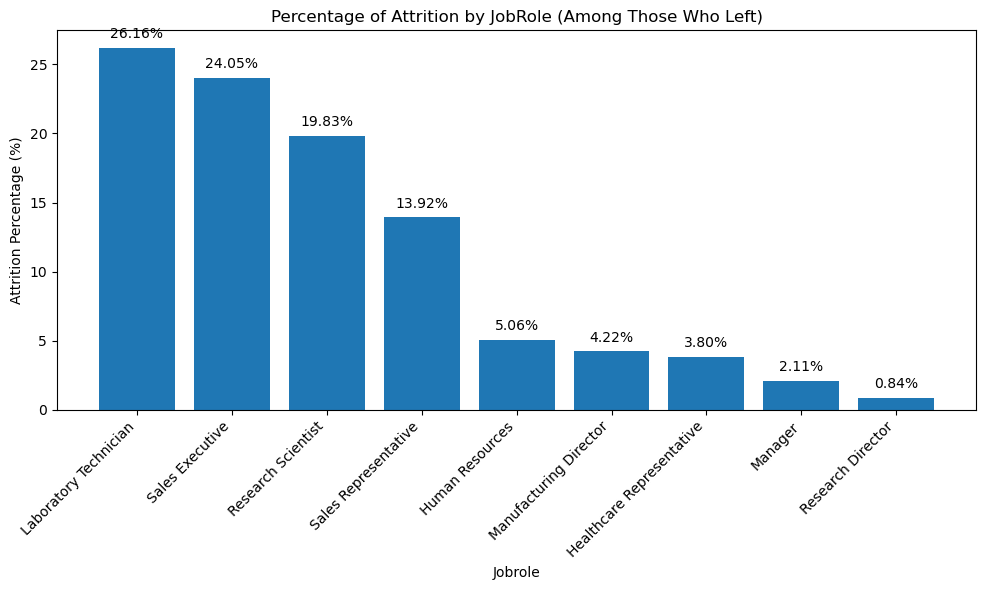


--- Analyzing Attrition by: MaritalStatus ---
  MaritalStatus  AttritionCount  AttritionPercentage
2        Single             120            50.632911
1       Married              84            35.443038
0      Divorced              33            13.924051


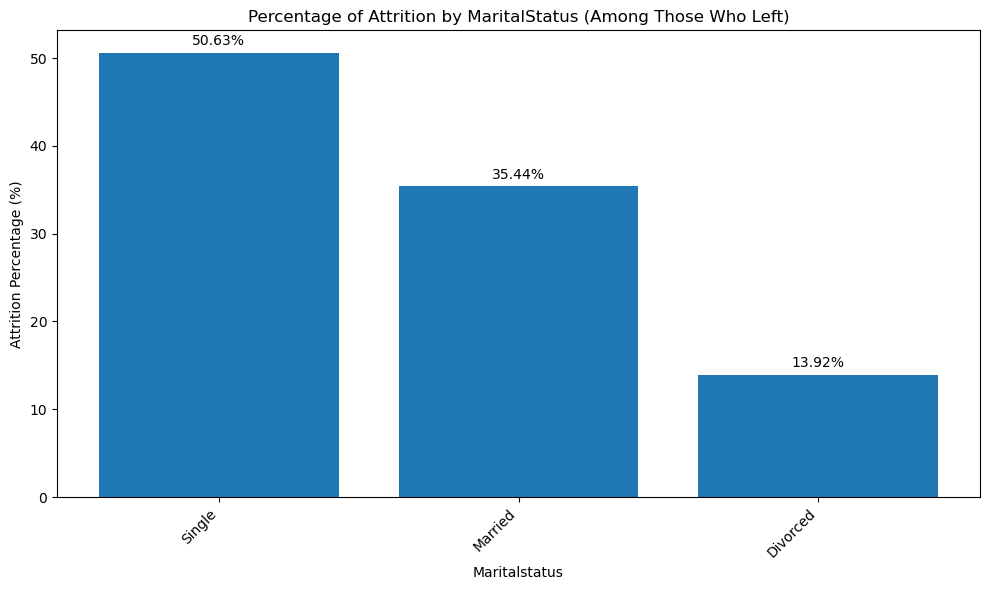


--- Analyzing Attrition by: OverTime ---
  OverTime  AttritionCount  AttritionPercentage
1      Yes             127            53.586498
0       No             110            46.413502


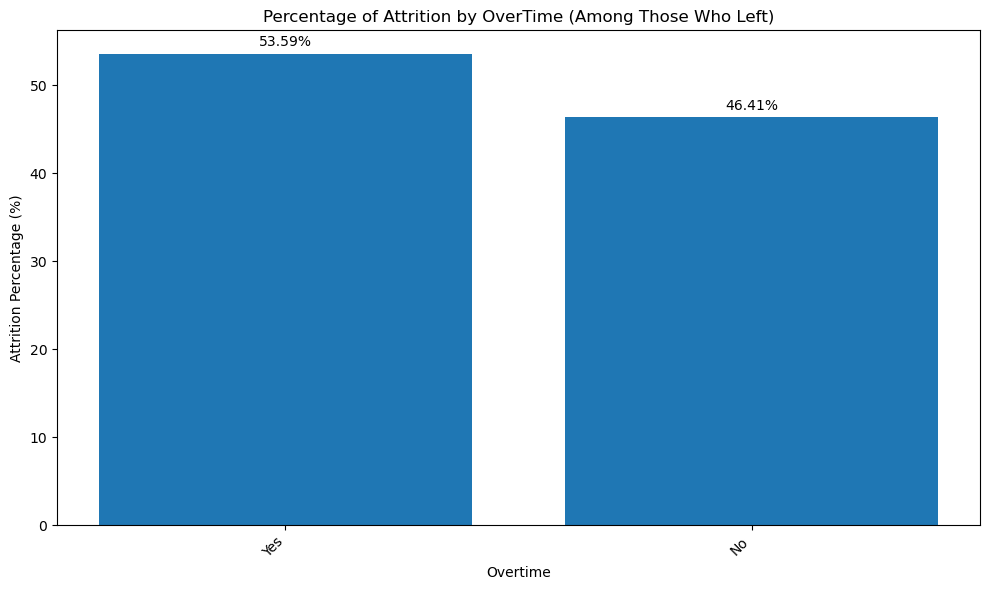


--- Analyzing Attrition by: Education_label ---
  Education_label  AttritionCount  AttritionPercentage
0        Bachelor              99            41.772152
4          Master              58            24.472574
2         College              44            18.565401
1   Below College              31            13.080169
3          Doctor               5             2.109705


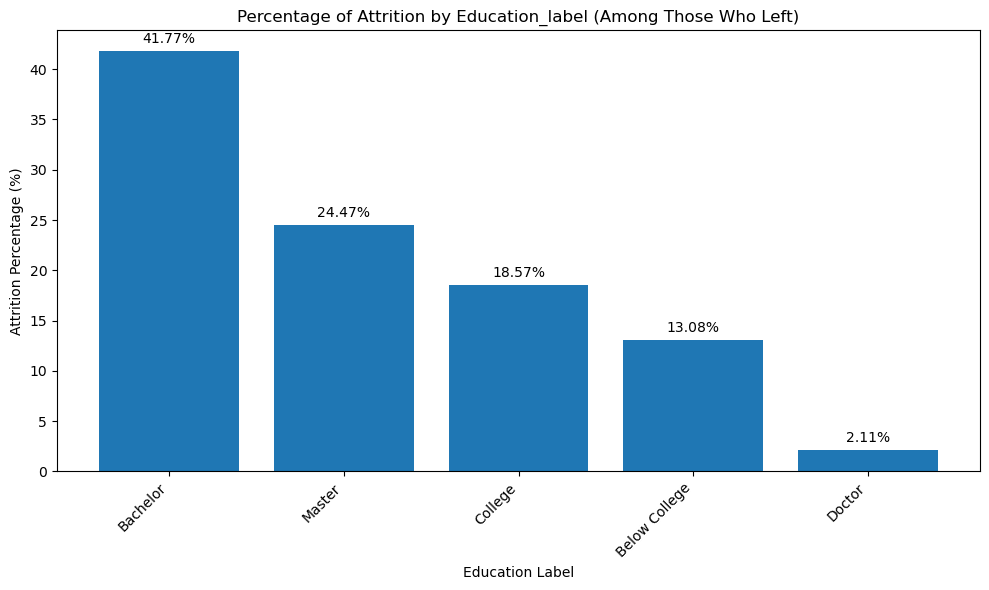


--- Analyzing Attrition by: EnvironmentSatisfaction_label ---
  EnvironmentSatisfaction_label  AttritionCount  AttritionPercentage
1                           Low              72            30.379747
0                          High              62            26.160338
3                     Very High              60            25.316456
2                        Medium              43            18.143460


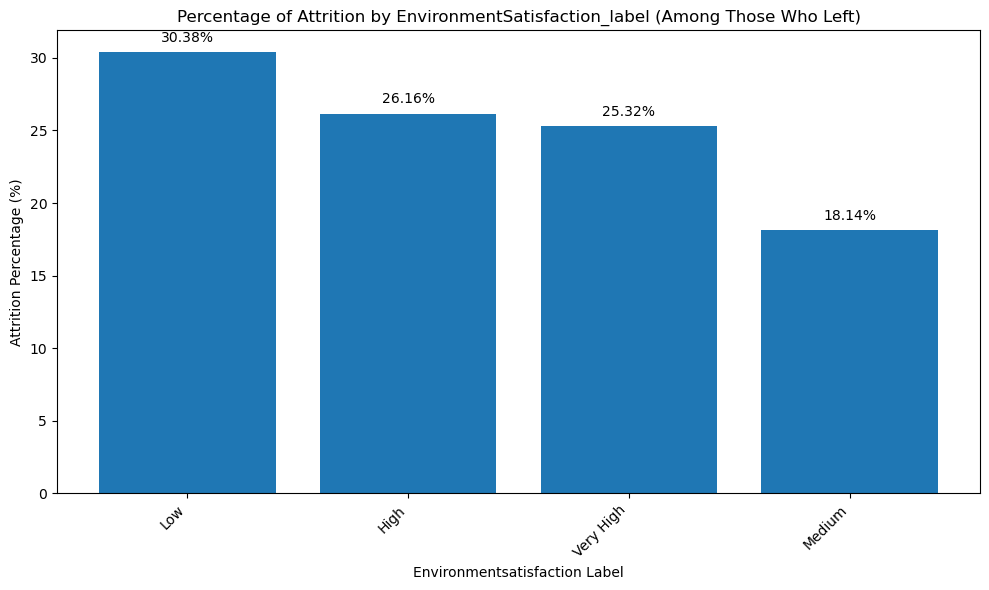


--- Analyzing Attrition by: JobInvolvement_label ---
  JobInvolvement_label  AttritionCount  AttritionPercentage
0                 High             125            52.742616
2               Medium              71            29.957806
1                  Low              28            11.814346
3            Very High              13             5.485232


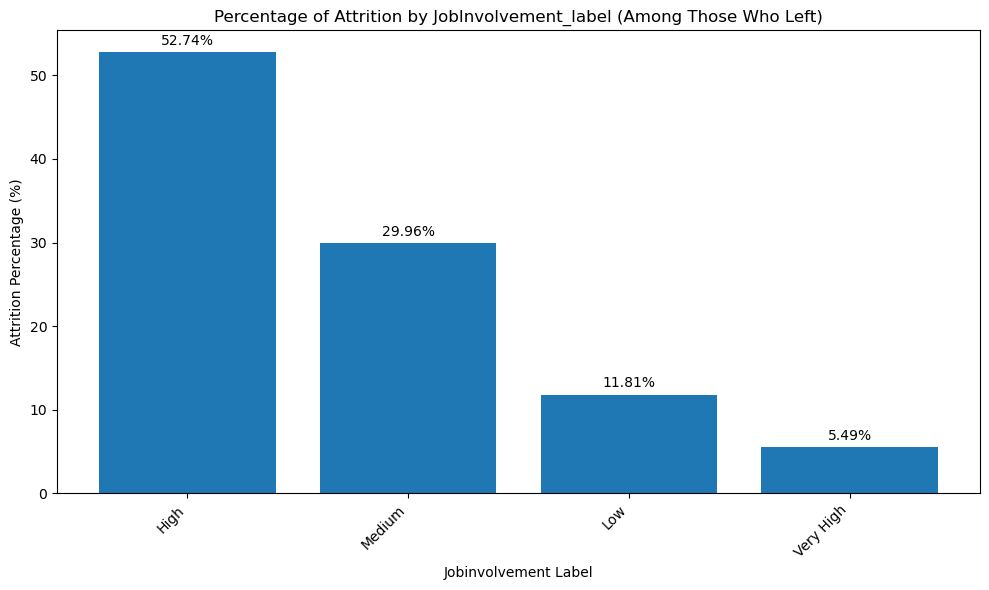


--- Analyzing Attrition by: JobSatisfaction_label ---
  JobSatisfaction_label  AttritionCount  AttritionPercentage
0                  High              73            30.801688
1                   Low              66            27.848101
3             Very High              52            21.940928
2                Medium              46            19.409283


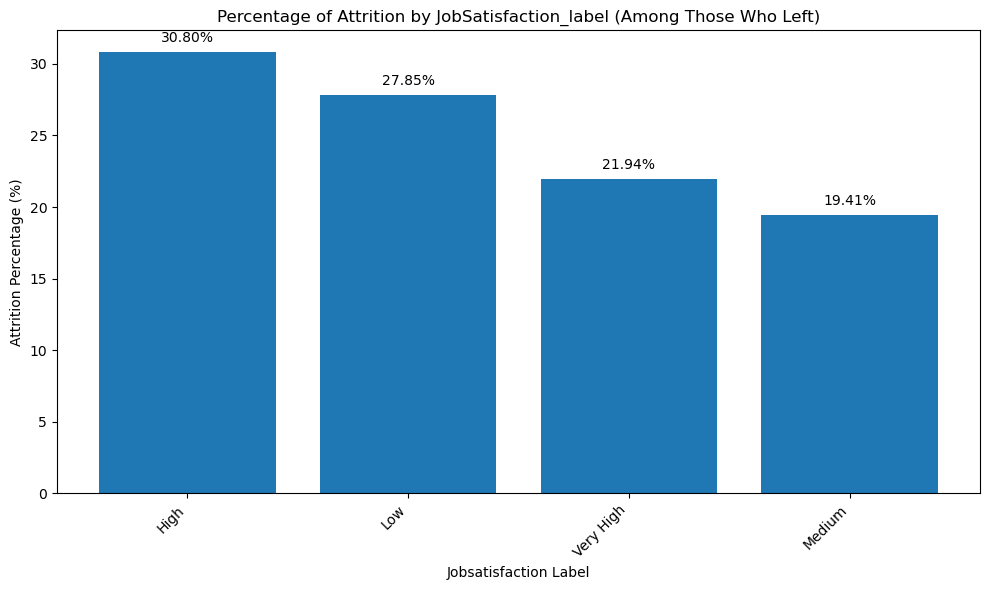


--- Analyzing Attrition by: PerformanceRating_label ---
  PerformanceRating_label  AttritionCount  AttritionPercentage
0               Excellent             200            84.388186
1             Outstanding              37            15.611814


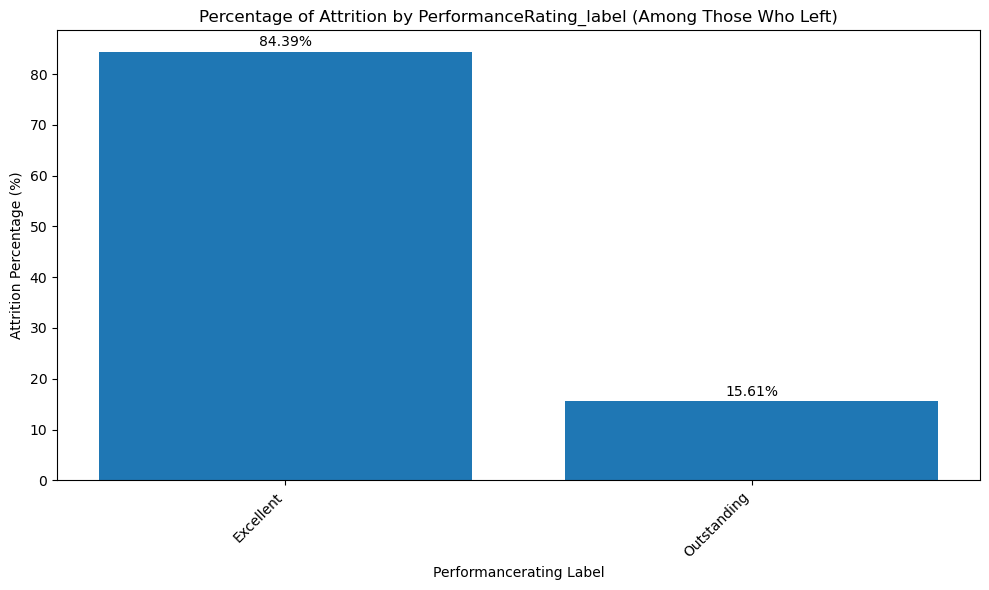


--- Analyzing Attrition by: RelationshipSatisfaction_label ---
  RelationshipSatisfaction_label  AttritionCount  AttritionPercentage
0                           High              71            29.957806
3                      Very High              64            27.004219
1                            Low              57            24.050633
2                         Medium              45            18.987342


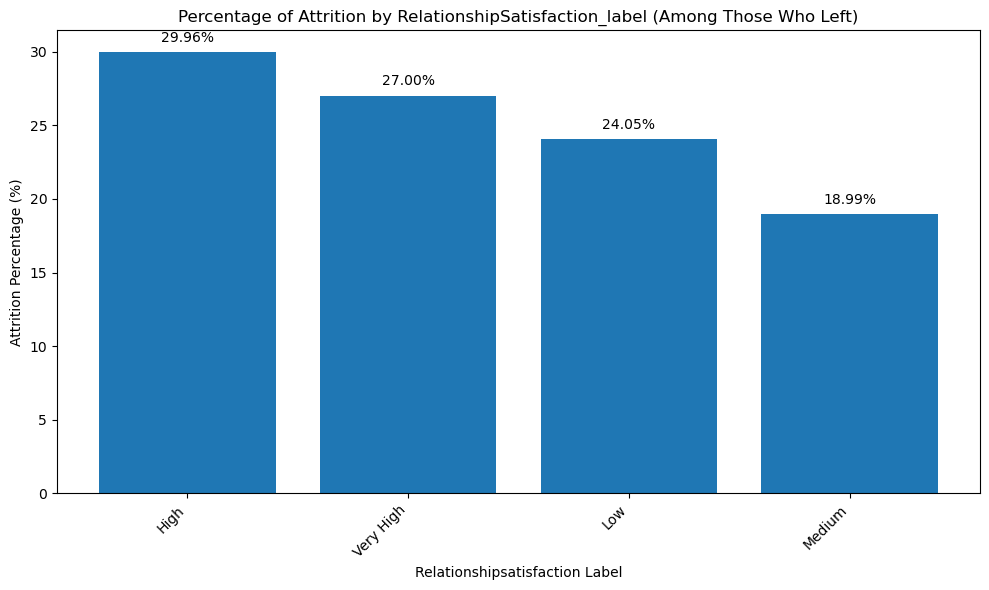


--- Analyzing Attrition by: WorkLifeBalance_label ---
  WorkLifeBalance_label  AttritionCount  AttritionPercentage
2                Better             127            53.586498
3                  Good              58            24.472574
1                  Best              27            11.392405
0                   Bad              25            10.548523


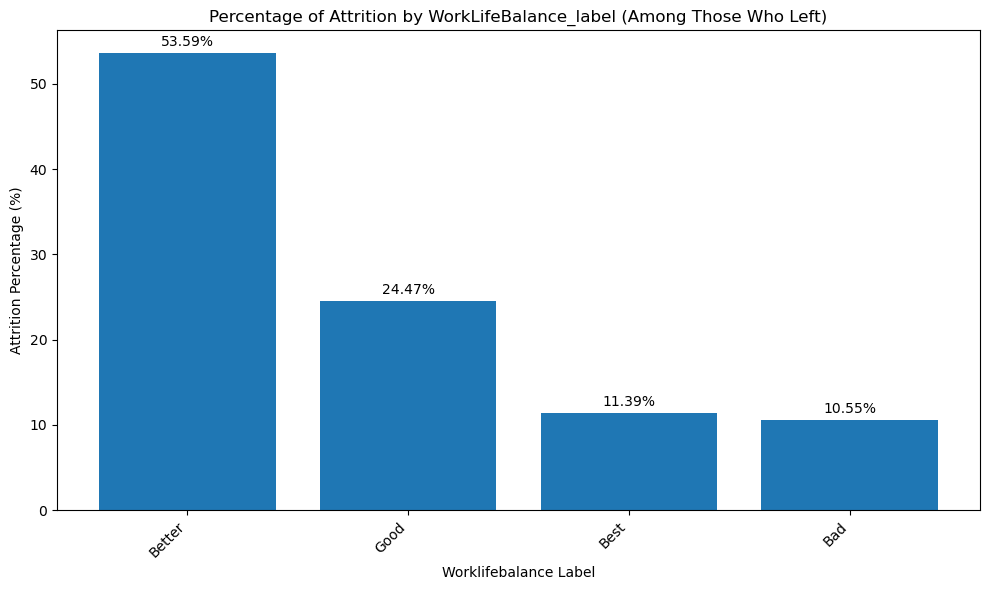

In [38]:
def analyze_attrition_by_category(df, category_column):
    """
    Analyzes attrition percentage based on a categorical variable.

    Args:
        df (pd.DataFrame): The DataFrame containing employee data with an 'Attrition' column (True/False)
                           and the specified categorical column.
        category_column (str): The name of the categorical column to analyze.

    Returns:
        pd.DataFrame: A DataFrame showing the percentage of attrition for each category,
                      or None if the category column is not found.
    """
    if category_column not in df.columns:
        print(f"Error: Column '{category_column}' not found in the DataFrame.")
        return None

    attrition_df = df[df['Attrition_Flag'] == True].copy()
    attrition_by_category = attrition_df.groupby(category_column).size().reset_index(name='AttritionCount')
    total_attrition = attrition_by_category['AttritionCount'].sum()

    if total_attrition > 0:
        attrition_by_category['AttritionPercentage'] = (attrition_by_category['AttritionCount'] / total_attrition) * 100
        attrition_by_category = attrition_by_category.sort_values(ascending=False, by= 'AttritionPercentage')

    else:
        attrition_by_category['AttritionPercentage'] = 0.0

    return attrition_by_category

def plot_attrition_percentage(df_results, category_column):
    """
    Plots the attrition percentage by category using Plotly barplot.

    Args:
        df_results (pd.DataFrame): DataFrame output from analyze_attrition_by_category.
        category_column (str): The name of the categorical column being plotted.
    """
    if df_results is not None and not df_results.empty:
        plt.figure(figsize=(10, 6))  # Adjust figure size as needed
        bars = plt.bar(df_results[category_column], df_results['AttritionPercentage'])
        plt.title(f'Percentage of Attrition by {category_column} (Among Those Who Left)')
        plt.xlabel(category_column.replace('_', ' ').title())
        plt.ylabel('Attrition Percentage (%)')

        # Add percentage values above the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    elif df_results is None:
        pass  # Error message already printed in analyze_attrition_by_category
    else:
        print(f"No attrition data to plot for {category_column}.")



# List categorical columns you want to analyze
#categorical_cols_to_analyze = ['Education_label', 'EnvironmentSatisfaction_label','JobInvolvement_label','JobSatisfaction_label','PerformanceRating_label','RelationshipSatisfaction_label','WorkLifeBalance_label']
categorical_cols_to_analyze = df.select_dtypes(include=object).columns
# Remove Attrition colum
categorical_cols_to_analyze = [column_x for column_x in categorical_cols_to_analyze  if column_x != 'Attrition']

# Loop through the list of categorical columns
for col in categorical_cols_to_analyze:
    print(f"\n--- Analyzing Attrition by: {col} ---")
    attrition_results = analyze_attrition_by_category(df, col)
    if attrition_results is not None:
        print(attrition_results)
        plot_attrition_percentage(attrition_results, col)